In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# load the training and test datasets
train_data = datasets.MNIST(root='data', train=True,download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,download=True, transform=transform)

In [4]:
num_workers = 0
# how many samples per batch to load
batch_size = 20

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

In [10]:
class Autoencoder(nn.Module):
    def __init__(self, encoding_dim):
        super(Autoencoder, self).__init__()
        self.fc1 = nn.Linear(784, encoding_dim) # Encoder
        self.fc2 = nn.Linear(encoding_dim, 784) # Decoder
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        return x

In [11]:
encoding_dim  = 32
model = Autoencoder(encoding_dim)

In [12]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [13]:
n_epochs = 15
for epoch in range(n_epochs):
    train_loss = 0.0
    for data in train_loader:
        img,_ = data
        
        img = img.view(img.size(0), -1) # Flatten image
        optimizer.zero_grad()
        out = model(img)
        loss = criterion(out, img)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*img.size(0)
    
    train_loss = train_loss/len(train_loader)
    print("Epoch:{} \tTraining Loss:{:.6f}".format(epoch, train_loss))

C:\Users\matthew.millar\Anaconda3\envs\TF2\lib\site-packages\torch\nn\functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch:0 	Training Loss:0.696053
Epoch:1 	Training Loss:0.386808
Epoch:2 	Training Loss:0.353077
Epoch:3 	Training Loss:0.344647
Epoch:4 	Training Loss:0.340682
Epoch:5 	Training Loss:0.338223
Epoch:6 	Training Loss:0.336379
Epoch:7 	Training Loss:0.334847
Epoch:8 	Training Loss:0.333484
Epoch:9 	Training Loss:0.332297
Epoch:10 	Training Loss:0.331249
Epoch:11 	Training Loss:0.330321
Epoch:12 	Training Loss:0.329480
Epoch:13 	Training Loss:0.328714
Epoch:14 	Training Loss:0.328025


C:\Users\matthew.millar\Anaconda3\envs\TF2\lib\site-packages\torch\nn\functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


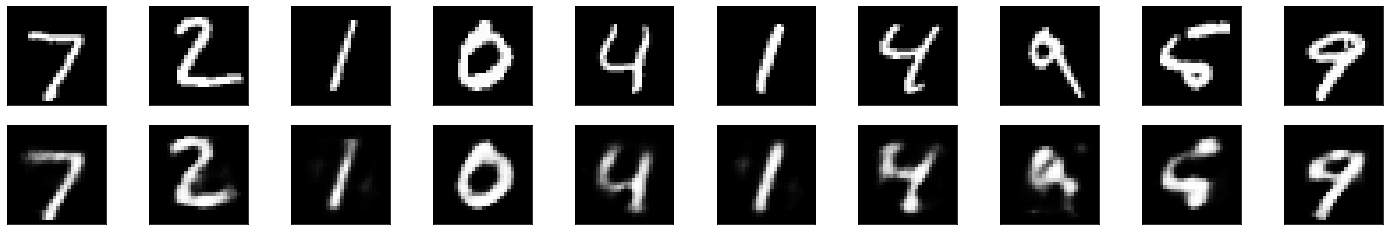

In [16]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

images_flatten = images.view(images.size(0), -1)
output = model(images_flatten)
images = images.numpy()

output = output.view(batch_size, 1, 28,28)
output = output.detach().numpy()

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

# input images on top row, reconstructions on bottom
for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
